## Contact Information

- **Name** - Mohd Muttalib
- **Phone** - +91-8445818187
- **Email** - muttalib1326@gmail.com
- **Portfolio** -[link](https://www.kaggle.com/mohdmuttalib)

## Lets Start Our Analysis

In [1]:
# Importing Necessary Libraries
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
from tqdm import tqdm

init_notebook_mode(connected=True)
filterwarnings("ignore")

In [2]:
# Loading Data
raw_df = pd.read_csv("../input/kaggle-survey-2022/kaggle_survey_2022_responses.csv")

raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23998 entries, 0 to 23997
Columns: 296 entries, Duration (in seconds) to Q44_12
dtypes: object(296)
memory usage: 54.2+ MB


In [3]:
# Dataset Sample
raw_df.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


In [4]:
# Getting All Selected Options (Answers) in One Column
def get_unique_questions(raw_df):
    unique_que_list = list(
        set(
            list(
                map(
                    lambda x: x.split("_")[0],
                    list(raw_df.loc[:, raw_df.columns.str.contains("_")].columns),
                )
            )
        )
    )
    for que_no in tqdm(unique_que_list):
        raw_df[que_no] = raw_df.loc[:, raw_df.columns.str.contains(que_no)].apply(
            lambda x: "//".join(x.dropna().astype(str)), axis=1
        )


get_unique_questions(raw_df)

100%|██████████| 25/25 [01:43<00:00,  4.14s/it]


In [5]:
# Removing Columns Generated Due to Multiple Options

new_df = raw_df.drop(
    list(raw_df.loc[:, raw_df.columns.str.contains("_")].columns), axis=1
)

for i in tqdm(range(5, len(new_df.columns))):
    new_df.iloc[:, i] = new_df.iloc[:, i].apply(lambda x: str(x).split("//"))

new_df["Counter"] = 1

100%|██████████| 39/39 [00:01<00:00, 27.86it/s]


# Participants Around the World

In [6]:
data = [
    dict(
        type="choropleth",
        locations=new_df["Q4"].value_counts().index,
        z=new_df["Q4"].value_counts(),
        locationmode="country names",
        autocolorscale=True,
        marker=dict(line=dict(color="rgb(58,100,69)", width=0.6)),
        colorbar=dict(autotick=True, tickprefix="", title="No. of Participants"),
    )
]

layout = dict(
    title="Participants Around the World",
    geo=dict(
        showframe=True,
        showcoastlines=True,
        showocean=True,
        showlakes=True,
        oceancolor="#aef6f7",
        projection=dict(type="robinson"),
        margin=dict(b=0, t=0, l=0, r=0, pad=5),
    ),
    autosize=True,
)

fig = dict(data=data, layout=layout)

iplot(fig, validate=False)

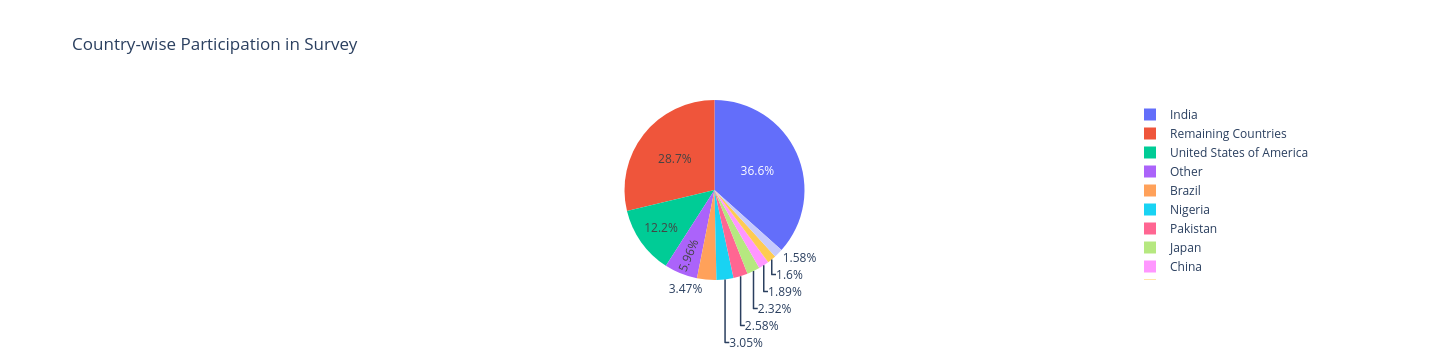

In [7]:
country_wise_participants_dict = new_df.loc[1:, "Q4"].value_counts()[:10].to_dict()
country_wise_participants_dict["Remaining Countries"] = sum(
    new_df.loc[1:, "Q4"].value_counts()[10:]
)

px.pie(
    pd.DataFrame(
        {
            "Country": country_wise_participants_dict.keys(),
            "Count": country_wise_participants_dict.values(),
        }
    ),
    names="Country",
    values="Count",
    title="Country-wise Participation in Survey",
)

## Like Experts Say, "India is going to be leading country in Industry 4.0". Numbers are speaking here. Around 36% of participants in survey were from the India followed by USA (12%).

# Aging Analysis

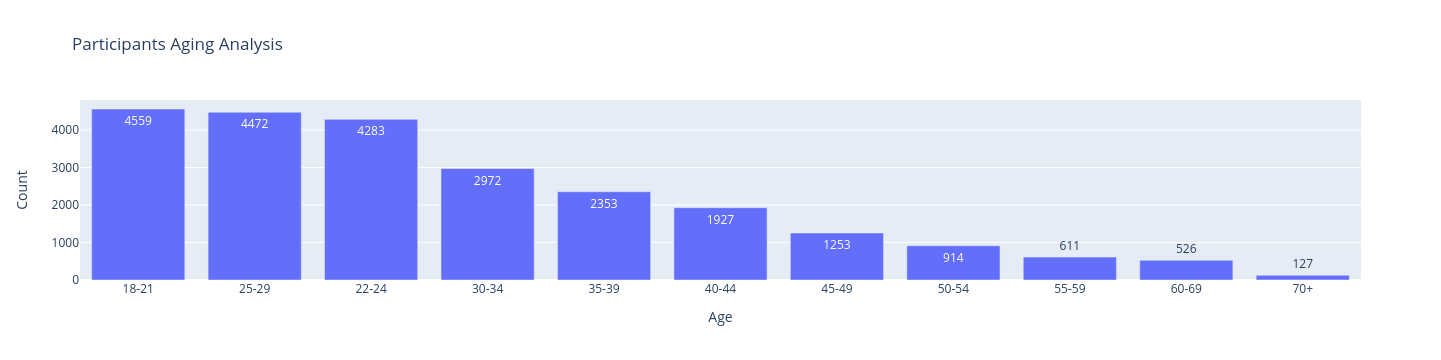

In [8]:
fig = px.bar(
    new_df.loc[1:, "Q2"].value_counts(),
    y="Q2",
    labels={"index": "Age", "Q2": "Count", "text": "Count"},
    text=(new_df.loc[1:, "Q2"].value_counts()),
    title="Participants Aging Analysis",
)
fig.show()

## Most of the kagglers participated in survey are below the age of 25. Future of data science field looks bright when so many young people have already started exploring it.

# Gender

In [9]:
pd.DataFrame(new_df.loc[1:, "Q3"].value_counts()).reset_index().rename(
    columns={"index": "Gender", "Q3": "Count"}
)

,Gender,Count
0,Man,18266
1,Woman,5286
2,Prefer not to say,334
3,Nonbinary,78
4,Prefer to self-describe,33


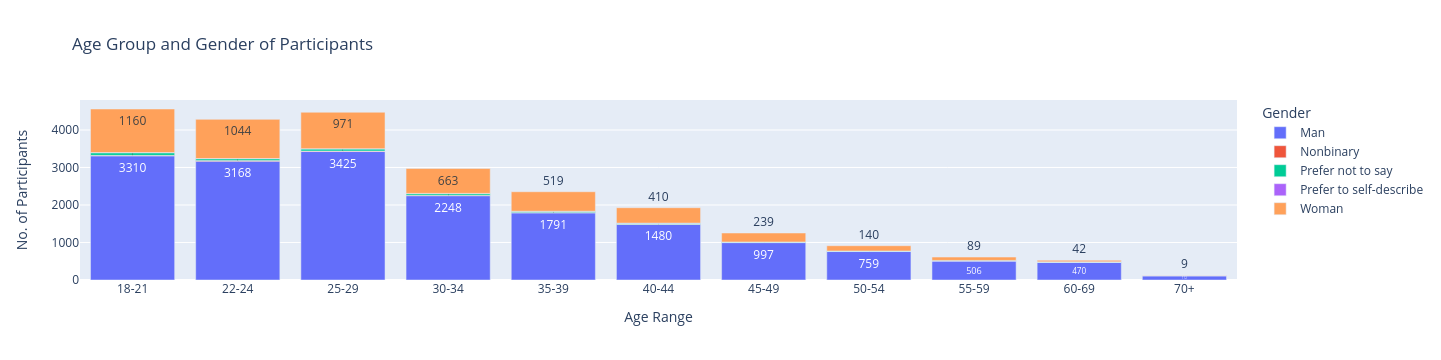

In [10]:
fig = px.bar(
    new_df.loc[1:].groupby(["Q2", "Q3"]).sum().reset_index(),
    x="Q2",
    y="Counter",
    color="Q3",
    title="Age Group and Gender of Participants",
    labels={"Counter": "No. of Participants", "Q2": "Age Range", "Q3": "Gender"},
    text_auto=True,
)
fig.show()

In [11]:
pd.pivot_table(
    new_df[1:],
    index="Q4",
    values="Counter",
    columns="Q3",
    aggfunc="count",
).sort_values("Man", ascending=False)

Q3,Man,Nonbinary,Prefer not to say,Prefer to self-describe,Woman
Q4,,,,,
India,6488.0,5.0,110.0,10.0,2179.0
United States of America,2047.0,34.0,59.0,7.0,773.0
Other,1127.0,5.0,19.0,4.0,275.0
Brazil,706.0,2.0,6.0,1.0,118.0
Nigeria,548.0,NaN,6.0,NaN,177.0
Pakistan,512.0,NaN,5.0,NaN,103.0
Japan,504.0,2.0,6.0,NaN,44.0
China,356.0,3.0,15.0,NaN,79.0
Mexico,316.0,2.0,NaN,1.0,61.0


## Disappointed with womens participation. I was expecting better numbers. Womens participation around the world is only 22%.

# Students Participated in Survey

In [12]:
no_of_students = new_df["Q5"].value_counts()["Yes"]
no_of_students_pct = (no_of_students / len(raw_df)) * 100

print(
    "{} ({:.2f}%) Students participated in Survey.".format(
        no_of_students, no_of_students_pct
    )
)

11961 (49.84%) Students participated in Survey.


## Surprised to know that 11961 (49.84%) Students participated in Survey. Thought that most of the  participants will be working professionals but looks like students are also being ready to jump start their career in data science.

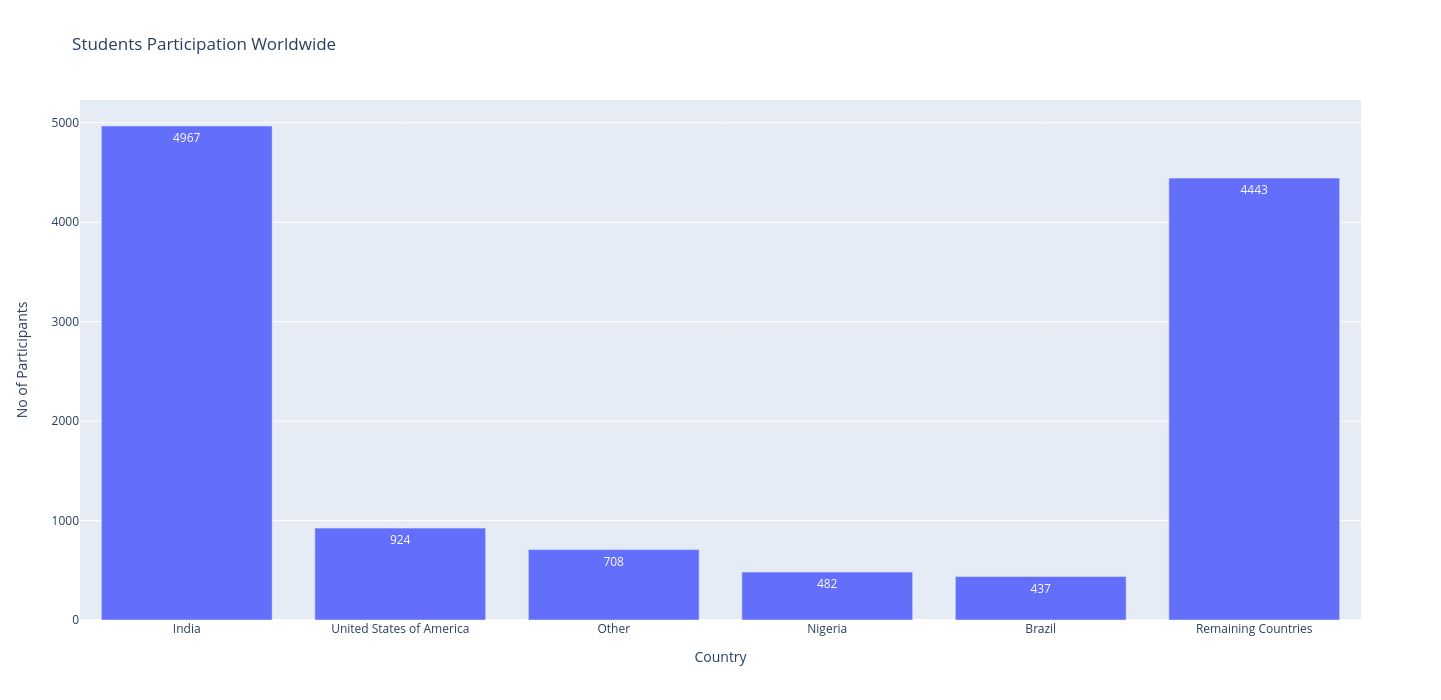

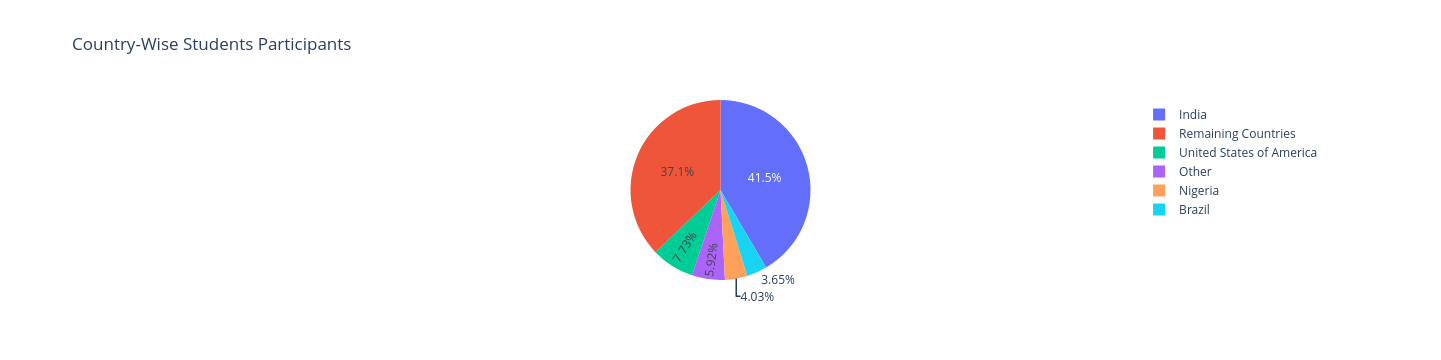

In [13]:
dict1 = new_df[new_df["Q5"] == "Yes"]["Q4"].value_counts()[:5].to_dict()
dict1["Remaining Countries"] = (
    new_df[new_df["Q5"] == "Yes"]["Q4"].value_counts()[5:].sum()
)

fig1 = px.bar(
    pd.DataFrame({"Country": dict1.keys(), "No of Participants": dict1.values()}),
    x="Country",
    y="No of Participants",
    text="No of Participants",
    barmode="group",
    height=700,
    title="Students Participation Worldwide",
)
fig1.show()

fig2 = px.pie(
    pd.DataFrame({"Country": dict1.keys(), "Participants": dict1.values()}),
    values="Participants",
    names="Country",
    title="Country-Wise Students Participants",
)

fig2.show()

## Although most of the students participants were from India, I am impressed with Nigerian student group. Keep it up buddies!

# Platform for Data Science Courses

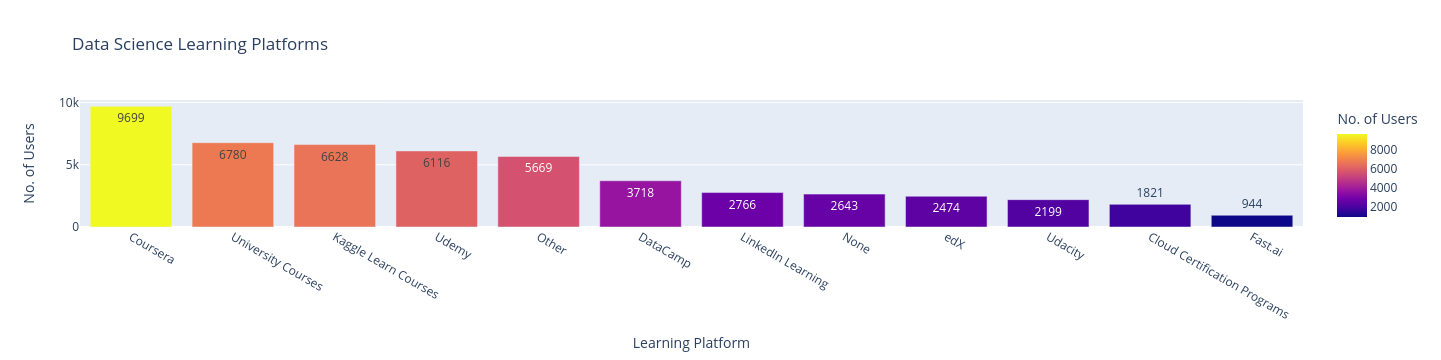

In [14]:
ds_platforms_dict = new_df.explode("Q6").loc[1:, "Q6"].value_counts().to_dict()
ds_platforms_dict["University Courses"] = ds_platforms_dict.pop(
    "University Courses (resulting in a university degree)"
)
ds_platforms_dict["Cloud Certification Programs"] = ds_platforms_dict.pop(
    "Cloud-certification programs (direct from AWS, Azure, GCP, or similar)"
)

px.bar(
    pd.DataFrame(
        {
            "Learning Platform": ds_platforms_dict.keys(),
            "No. of Users": ds_platforms_dict.values(),
        }
    ).sort_values("No. of Users", ascending=False),
    x="Learning Platform",
    y="No. of Users",
    color="No. of Users",
    text="No. of Users",
    title="Data Science Learning Platforms",
)

## Below are the top 3 platforms chosen by participants as there choice for learning data science. :
1) Coursera                                                
2) University Courses (resulting in a university degree)   
3) Kaggle Learn Courses                                     

## Lets help these learning platforms presenting them major number of their users around the globe.

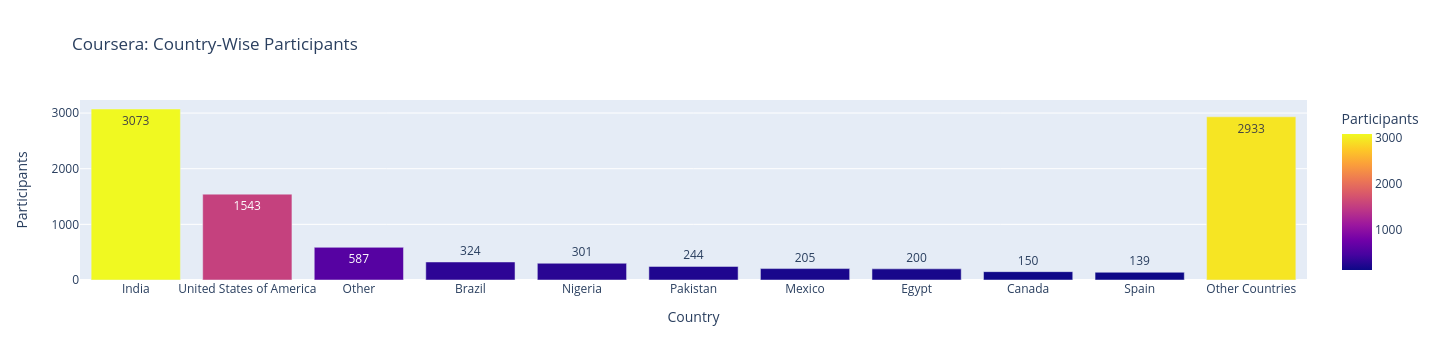

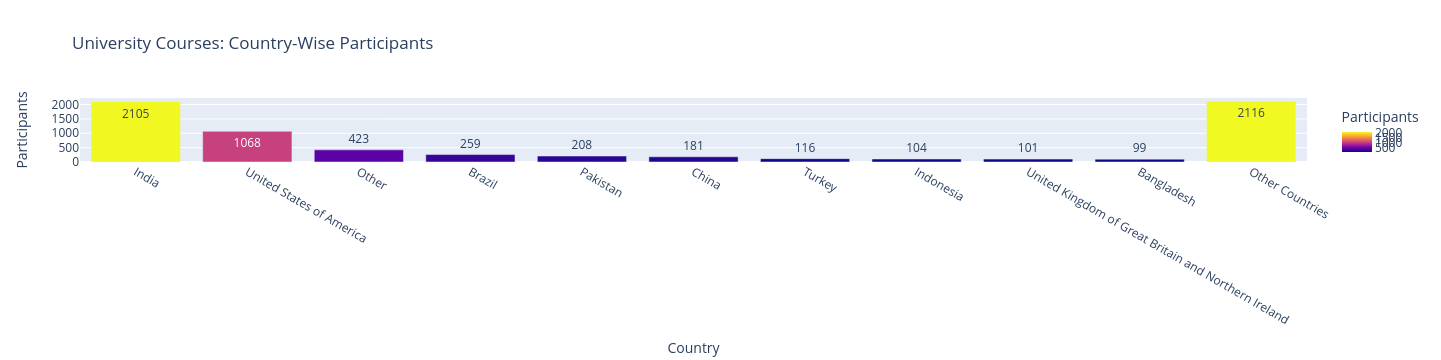

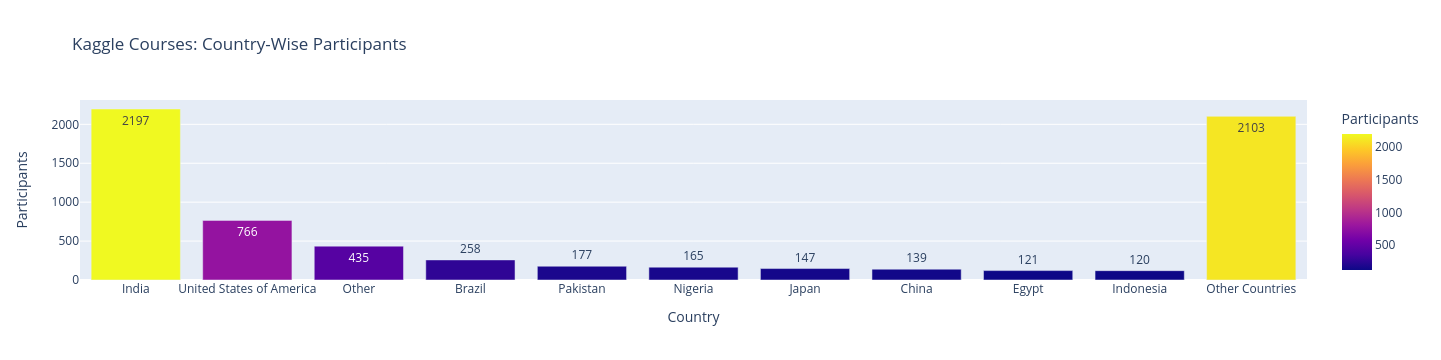

In [15]:
learning_platforms_df = new_df.explode("Q6").loc[
    1:,
]

coursera_dict = (
    learning_platforms_df[learning_platforms_df["Q6"] == "Coursera"]["Q4"]
    .value_counts()[:10]
    .to_dict()
)
coursera_dict["Other Countries"] = sum(
    learning_platforms_df[learning_platforms_df["Q6"] == "Coursera"][
        "Q4"
    ].value_counts()[10:]
)

universities_dict = (
    learning_platforms_df[
        learning_platforms_df["Q6"]
        == "University Courses (resulting in a university degree)"
    ]["Q4"]
    .value_counts()[:10]
    .to_dict()
)
universities_dict["Other Countries"] = sum(
    learning_platforms_df[
        learning_platforms_df["Q6"]
        == "University Courses (resulting in a university degree)"
    ]["Q4"].value_counts()[10:]
)

kaggle_dict = (
    learning_platforms_df[learning_platforms_df["Q6"] == "Kaggle Learn Courses"]["Q4"]
    .value_counts()[:10]
    .to_dict()
)
kaggle_dict["Other Countries"] = sum(
    learning_platforms_df[learning_platforms_df["Q6"] == "Kaggle Learn Courses"][
        "Q4"
    ].value_counts()[10:]
)


fig1 = px.bar(
    pd.DataFrame(
        {"Country": coursera_dict.keys(), "Participants": coursera_dict.values()}
    ),
    x="Country",
    y="Participants",
    color="Participants",
    text="Participants",
    title="Coursera: Country-Wise Participants",
)
fig1.show()


fig2 = px.bar(
    pd.DataFrame(
        {
            "Country": universities_dict.keys(),
            "Participants": universities_dict.values(),
        }
    ),
    x="Country",
    y="Participants",
    color="Participants",
    text="Participants",
    title="University Courses: Country-Wise Participants",
)
fig2.show()


fig3 = px.bar(
    pd.DataFrame({"Country": kaggle_dict.keys(), "Participants": kaggle_dict.values()}),
    x="Country",
    y="Participants",
    color="Participants",
    text="Participants",
    title="Kaggle Courses: Country-Wise Participants",
)
fig3.show()

## I will leave the business development job for these plaforms.🙂

# Learning Platform Preferred in Early Stage of Learning Data Science

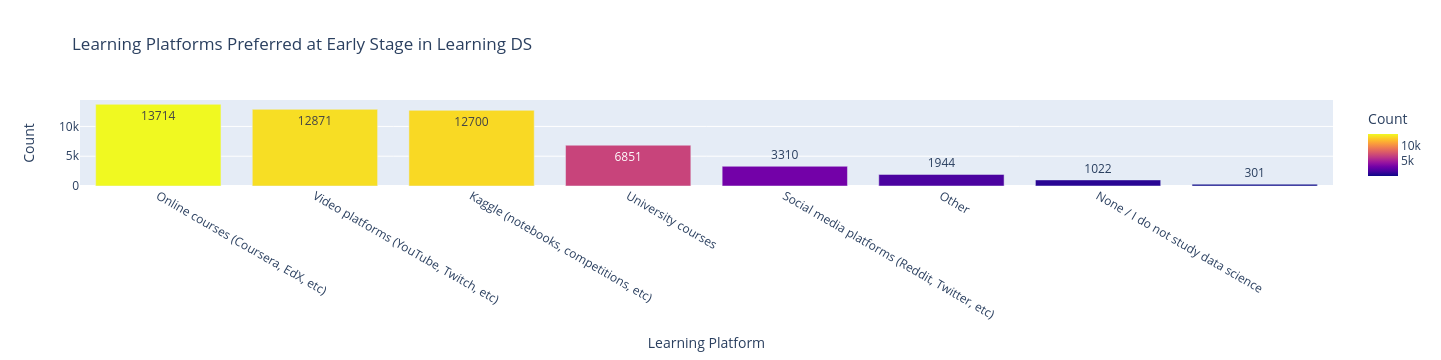

In [16]:
new_df.loc[0, "Q7"][0].split(" -")[0]
early_stage_learning_platforms = (
    new_df.explode("Q7").loc[1:, "Q7"].value_counts().to_dict()
)
learning_platforms_df = pd.DataFrame(
    {
        "Learning Platform": early_stage_learning_platforms.keys(),
        "Count": early_stage_learning_platforms.values(),
    }
)
fig = px.bar(
    learning_platforms_df,
    x="Learning Platform",
    y="Count",
    color="Count",
    text="Count",
    title="Learning Platforms Preferred at Early Stage in Learning DS",
)
fig.show()

In [17]:
# print('In their earlier stage of learning data science, below are the top 3 learning platforms preferred by the participants. :\n')
# print(new_df.explode('Q7')['Q7'].value_counts()[:3])

## In their earlier stage of learning data science, below are the top 3 learning platforms preferred by the participants. :

1) Online courses (Coursera, EdX, etc)       
2) Video platforms (YouTube, Twitch, etc)    
3) Kaggle (notebooks, competitions, etc)     

# Highest Level of Education 

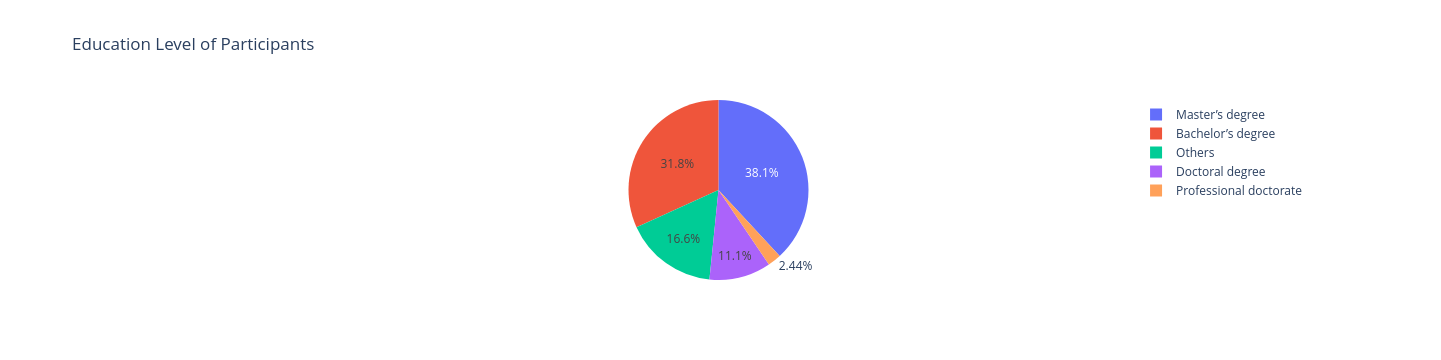

In [18]:
new_df.loc[0, "Q8"][0].split(" -")[0]

education_lvl = new_df.explode("Q8").loc[1:, "Q8"].value_counts().to_dict()

bachelors_degree_or_higher = [
    "Master’s degree",
    "Bachelor’s degree",
    "Doctoral degree",
    "Professional doctorate",
]
bachelors_degree_or_higher_dict = {
    a: b for a, b in education_lvl.items() if a in bachelors_degree_or_higher
}

highly_educated_participants = sum(bachelors_degree_or_higher_dict.values())

others = sum(
    {
        l: m for l, m in education_lvl.items() if l not in bachelors_degree_or_higher
    }.values()
)

ed_dict = bachelors_degree_or_higher_dict
ed_dict["Others"] = others

fig = px.pie(
    pd.DataFrame(
        {"Education_Level": ed_dict.keys(), "No_of_Participants": ed_dict.values()}
    ),
    values="No_of_Participants",
    names="Education_Level",
    title="Education Level of Participants",
)
fig.show()

## More than 50% of kagglers say that their highest qualification level is Master's degree or above. 😯

# Publishing Research Work

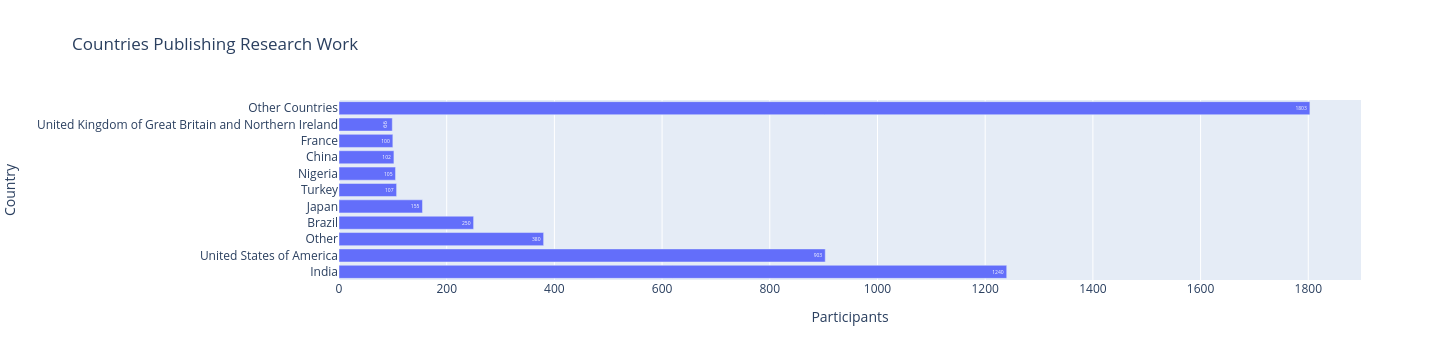

In [19]:
new_df.loc[0, "Q9"][0].split(" -")[0]

countries_exploring_DS = (
    new_df.explode("Q9")[new_df.explode("Q9")["Q9"] == "Yes"]["Q4"]
    .value_counts()[:10]
    .to_dict()
)
countries_exploring_DS["Other Countries"] = sum(
    new_df.explode("Q9")[new_df.explode("Q9")["Q9"] == "Yes"]["Q4"].value_counts()[10:]
)

fig = px.bar(
    pd.DataFrame(
        {
            "Country": countries_exploring_DS.keys(),
            "Participants": countries_exploring_DS.values(),
        }
    ),
    x="Participants",
    y="Country",
    text="Participants",
    title="Countries Publishing Research Work",
)

fig.show()

## Indians participation is not just only to add extra count but numbers validate that they are on first place in publishing research too.

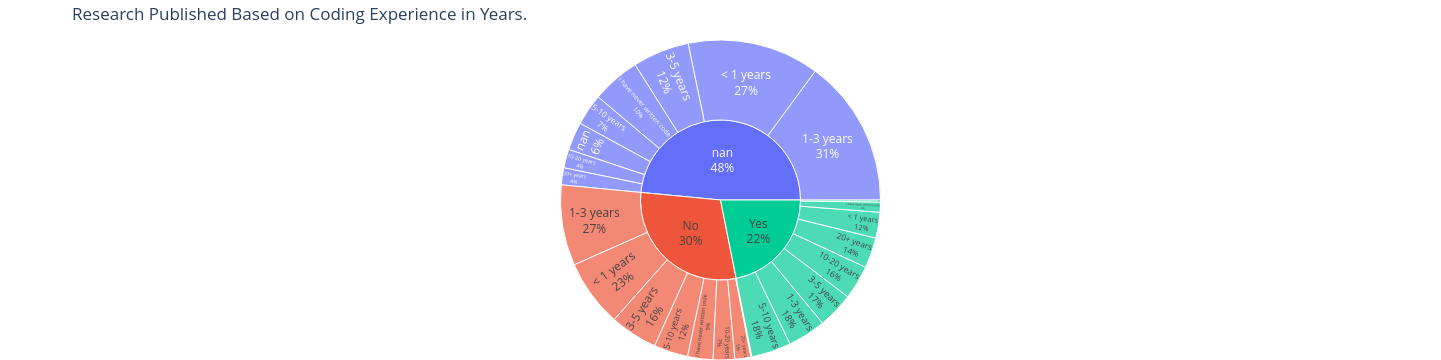

In [20]:
yoe_n_research = new_df.loc[1:][["Q9", "Q11", "Q8"]]

yoe_n_research["Q8"] = yoe_n_research["Q8"].apply(lambda x: x[0])
yoe_n_research["Q9"] = yoe_n_research["Q9"].apply(lambda x: x[0])
yoe_n_research["Q11"] = yoe_n_research["Q11"].apply(lambda x: x[0])

yoe_n_research.rename(
    columns={
        "Q8": "Highest Qualification",
        "Q9": "Research Published",
        "Q11": "YOE in Coding",
    },
    inplace=True,
)

fig = px.sunburst(
    data_frame=yoe_n_research,
    path=["Research Published", "YOE in Coding"],
    color="Research Published",
    title="Research Published Based on Coding Experience in Years.",
)

fig.update_traces(textinfo="label+percent parent")
fig.update_layout(margin=dict(t=40, l=0, r=0, b=0))
fig.show()

## Like many of us, I was guessing about people who are doing research and pusblished papers, preprints, conference proceedings, etc. , would be having more than 5-10 years of coding experience.
## But Here is what the fact is. Because of huge learning resources available nowadys and most importantly its fast accessibility due to internet, people are thinking beyond, going for innovations. And hence research field has participations coming from people who are in early stage of their career. 

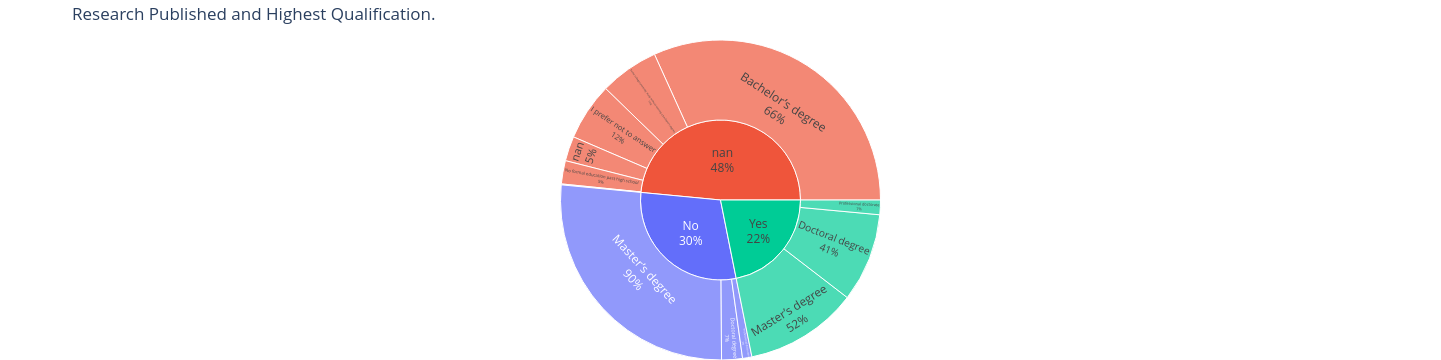

In [21]:
fig = px.sunburst(
    data_frame=yoe_n_research,
    path=["Research Published", "Highest Qualification"],
    color="Research Published",
    title="Research Published and Highest Qualification.",
)

fig.update_traces(textinfo="label+percent parent")
fig.update_layout(margin=dict(t=40, l=0, r=0, b=0))
fig.show()

## Data science practioners having education level as Master's Degree or higher are ahead in publishing their academic research like papers, preprints, conference proceedings, etc.

# Application of Machine Learning in Research

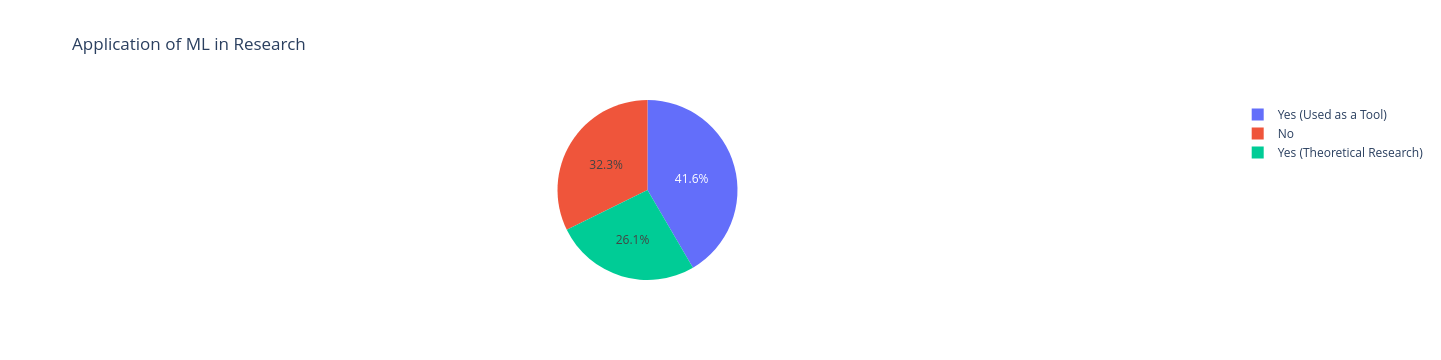

In [22]:
new_df.loc[0, "Q10"][0].split(" -")[0]

research_dict = new_df.explode("Q10").loc[1:, "Q10"].value_counts().to_dict()

research_dict.pop("")
research_dict["Yes (Used as a Tool)"] = research_dict.pop(
    "Yes, the research made use of machine learning as a tool (applied research)"
)
research_dict["Yes (Theoretical Research)"] = research_dict.pop(
    "Yes, the research made advances related to some novel machine learning method (theoretical research)"
)
fig = px.pie(
    pd.DataFrame(
        {
            "Used ML ?": research_dict.keys(),
            "No_of_Participants": research_dict.values(),
        }
    ),
    values="No_of_Participants",
    names="Used ML ?",
    title="Application of ML in Research",
)
fig.show()

## Based on valid responses received (5925), 4012(67.71%) researchers confirmed application of machine learning in their research.

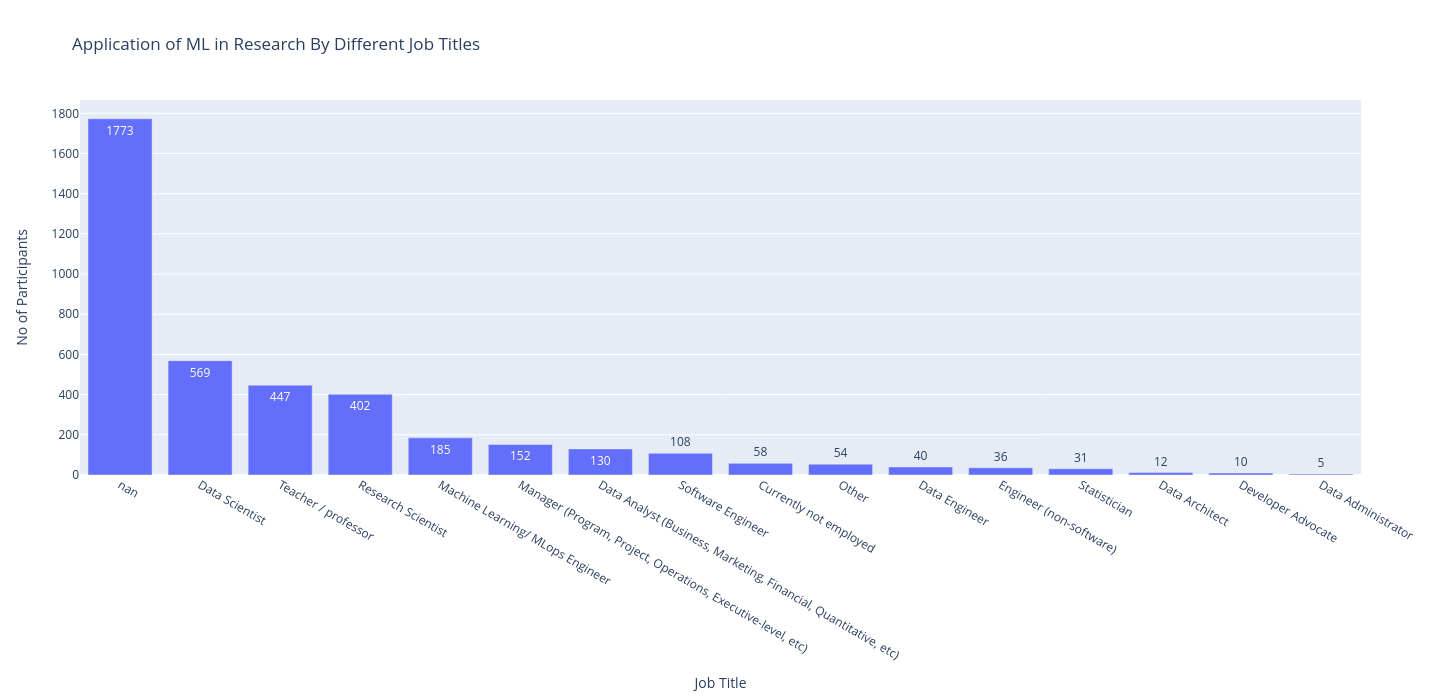

In [23]:
no_of_researchers = sum(
    new_df.explode("Q10")[
        (new_df.explode("Q10")["Q10"].str.startswith("Yes"))
        | (new_df.explode("Q10")["Q10"].str.startswith("No"))
    ]["Q10"].value_counts()
)

using_ml_for_research = (
    new_df.explode("Q10")[new_df.explode("Q10")["Q10"].str.startswith("Yes")]["Q23"]
    .apply(lambda x: x[0])
    .value_counts()
    .to_dict()
)

fig = px.bar(
    pd.DataFrame(
        {
            "Job Title": using_ml_for_research.keys(),
            "No of Participants": using_ml_for_research.values(),
        }
    ),
    x="Job Title",
    y="No of Participants",
    text="No of Participants",
    barmode="group",
    height=700,
    title="Application of ML in Research By Different Job Titles",
)
fig.show()

In [24]:
researchers_using_ml_in_research = new_df.explode("Q10")[
    new_df.explode("Q10")["Q10"].str.startswith("Yes")
]["Q9"].value_counts()[0]

## Data scientists are the ones leveraging machine learning the most in research work.

# Programming Languages Used by Data Science Practioners

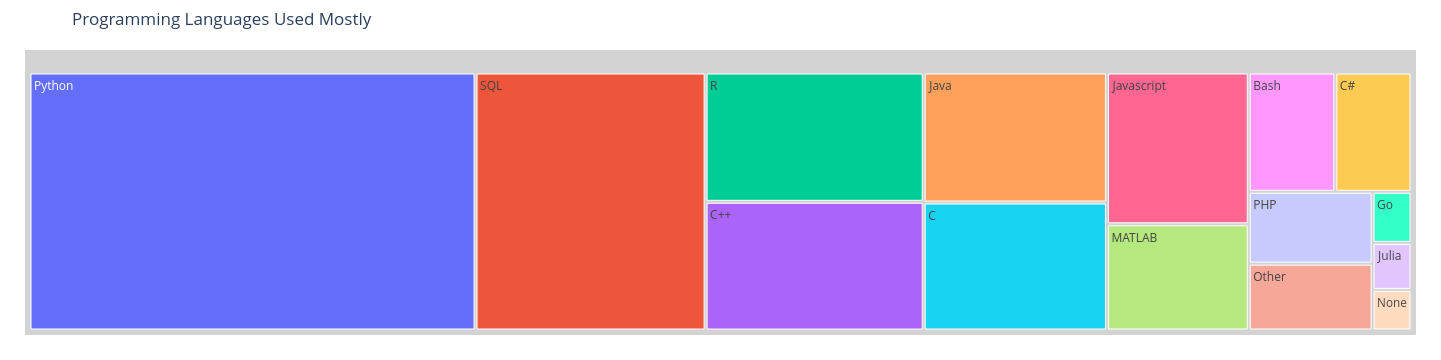

In [25]:
new_df.loc[0, "Q12"][0].split(" -")[0]


fig = px.treemap(
    new_df.explode("Q12").loc[1:, "Q12"].value_counts(),
    path=[new_df.explode("Q12").loc[1:, "Q12"].value_counts().index],
    values=new_df.explode("Q12").loc[1:, "Q12"].value_counts(),
    labels={"labels": "Language", "value": "No. of Users"},
    title="Programming Languages Used Mostly",
)
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

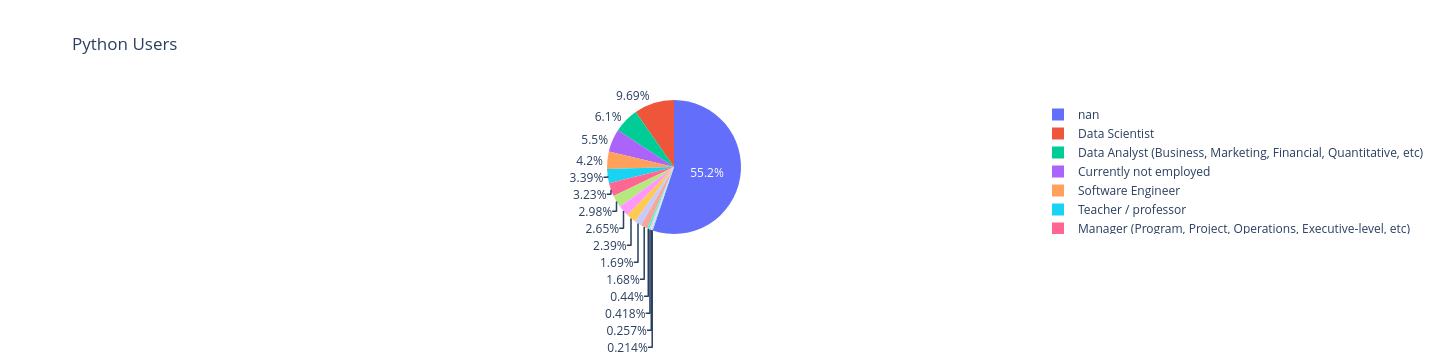

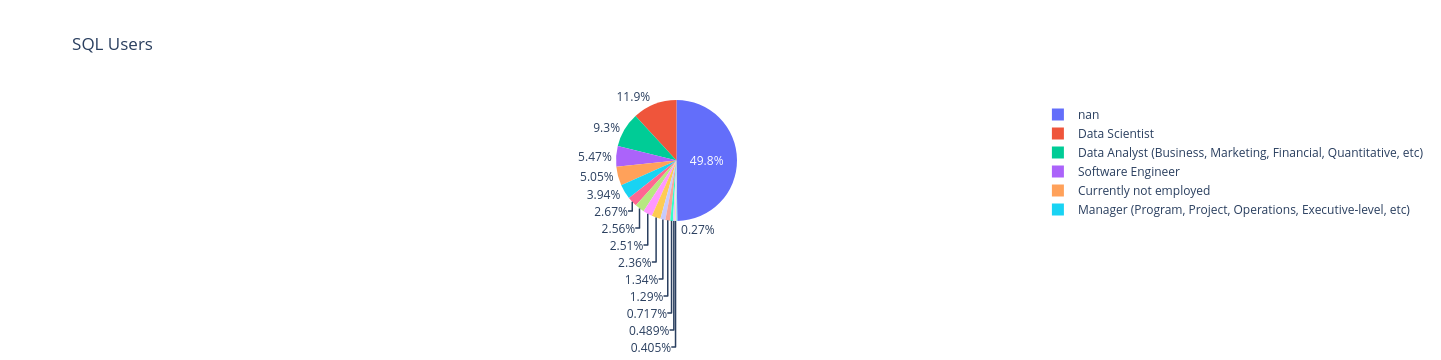

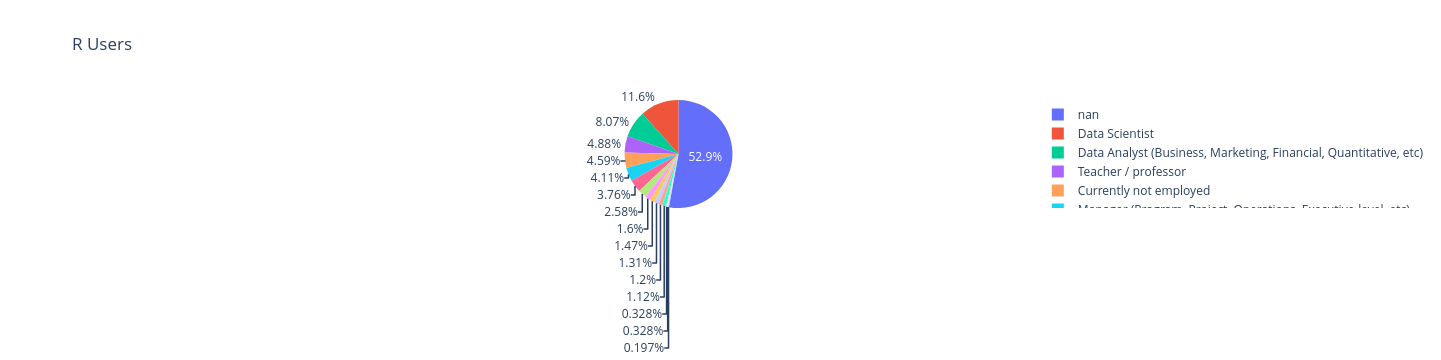

In [26]:
python_users = (
    new_df.explode("Q12")[new_df.explode("Q12")["Q12"] == "Python"]["Q23"]
    .apply(lambda x: x[0])
    .value_counts()
    .to_dict()
)
sql_users = (
    new_df.explode("Q12")[new_df.explode("Q12")["Q12"] == "SQL"]["Q23"]
    .apply(lambda x: x[0])
    .value_counts()
    .to_dict()
)
r_users = (
    new_df.explode("Q12")[new_df.explode("Q12")["Q12"] == "R"]["Q23"]
    .apply(lambda x: x[0])
    .value_counts()
    .to_dict()
)

fig1 = px.pie(
    pd.DataFrame({"Job Title": python_users.keys(), "Users": python_users.values()}),
    values="Users",
    names="Job Title",
    title="Python Users",
)
fig1.show()

fig2 = px.pie(
    pd.DataFrame({"Job Title": sql_users.keys(), "Users": sql_users.values()}),
    values="Users",
    names="Job Title",
    title="SQL Users",
)
fig2.show()

fig3 = px.pie(
    pd.DataFrame({"Job Title": r_users.keys(), "Users": r_users.values()}),
    values="Users",
    names="Job Title",
    title="R Users",
)
fig3.show()

## Python is the most used programming lanuage by data science practioners followed by SQL and R.

# Mostly Used IDE's

In [27]:
new_df.loc[0, "Q13"][0].split(" -")[0]

ide_dict = new_df.explode("Q13").loc[1:, "Q13"].value_counts().to_dict()

ide_df = pd.DataFrame({"IDE": ide_dict.keys(), "No. of Users": ide_dict.values()})

ide_df

,IDE,No. of Users
0,Jupyter Notebook,13684
1,Visual Studio Code (VSCode),9976
2,PyCharm,6099
3,JupyterLab,4887
4,Visual Studio,4416
5,Notepad++,3891
6,RStudio,3824
7,,3405
8,Spyder,2880
9,MATLAB,2302


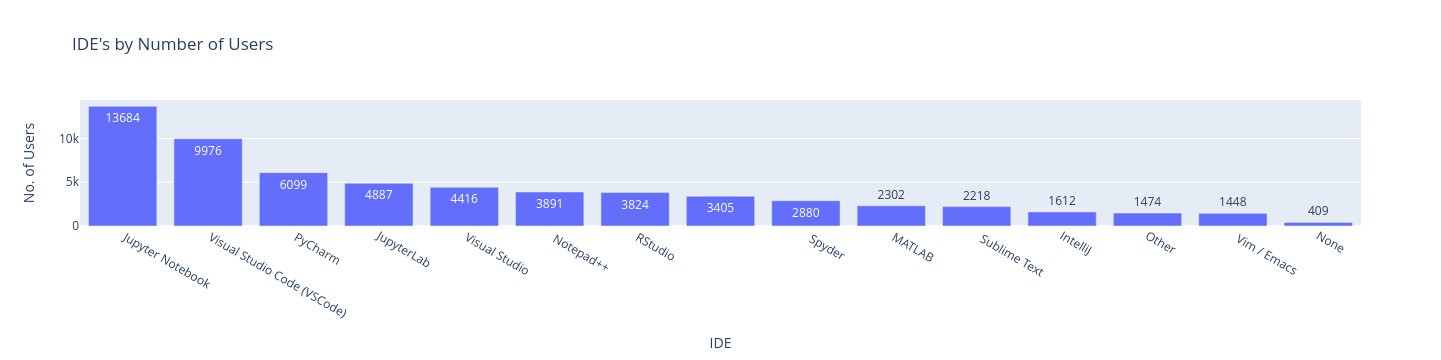

In [28]:
px.bar(
    pd.DataFrame({"IDE": ide_dict.keys(), "No. of Users": ide_dict.values()}),
    x="IDE",
    y="No. of Users",
    text="No. of Users",
    title="IDE's by Number of Users",
)

## Jupyter Notebook, Visual Studio Code (VSCode), Pycharm are the most favoured integrated development environments (IDE).

# Hosted Notebook Products

In [29]:
new_df.loc[0, "Q14"][0].split(" -")[0]

new_df.explode("Q14")["Q14"].value_counts()[:5]

colab_n_kaggle_users = new_df.explode("Q14")["Q14"].value_counts()[:2].sum()
colab_n_kaggle_users_pct = (colab_n_kaggle_users / len(raw_df)) * 100

# print(f'Total number of Colab and Kaggle Notebook Users: {colab_n_kaggle_users}')
# print('{:.2f} % of people using Colab and Kaggle notebooks.'.format(colab_n_kaggle_users_pct))

## Colab and Kaggle notebooks are found to be chosen the most by kagglers.

# Highly Preferred Python Visualization Libraries

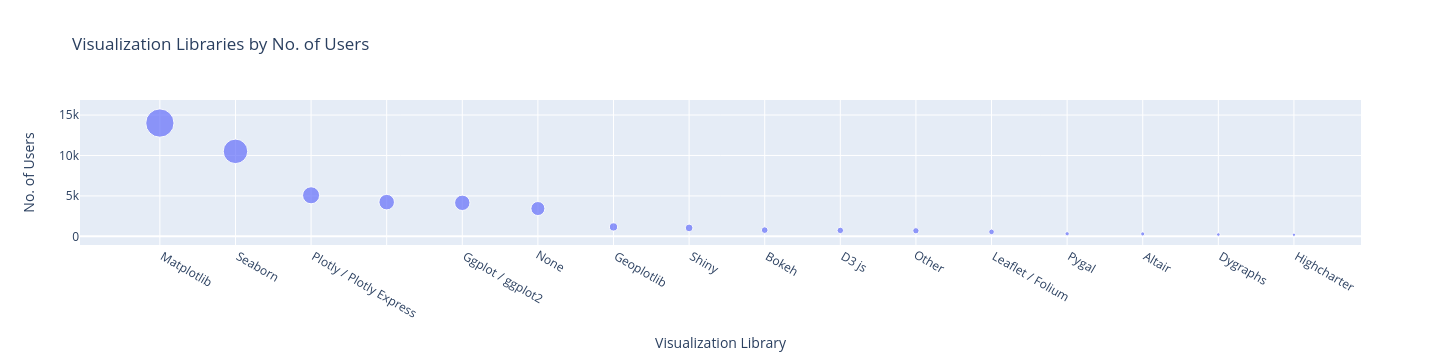

In [30]:
new_df.loc[0, "Q15"][0].split(" -")[0]

viz_lib_df = (
    pd.DataFrame(new_df.explode("Q15").loc[1:, "Q15"].value_counts())
    .reset_index()
    .rename(columns={"index": "Visualization Library", "Q15": "No. of Users"})
)

px.scatter(
    viz_lib_df,
    x="Visualization Library",
    y="No. of Users",
    size="No. of Users",
    title="Visualization Libraries by No. of Users",
)

## 'Matplotlib', 'Seaborn' and 'Plotly/Plotly Express' are the most used Python libraries for data visualization.

# Mostly Used ML Frameworks

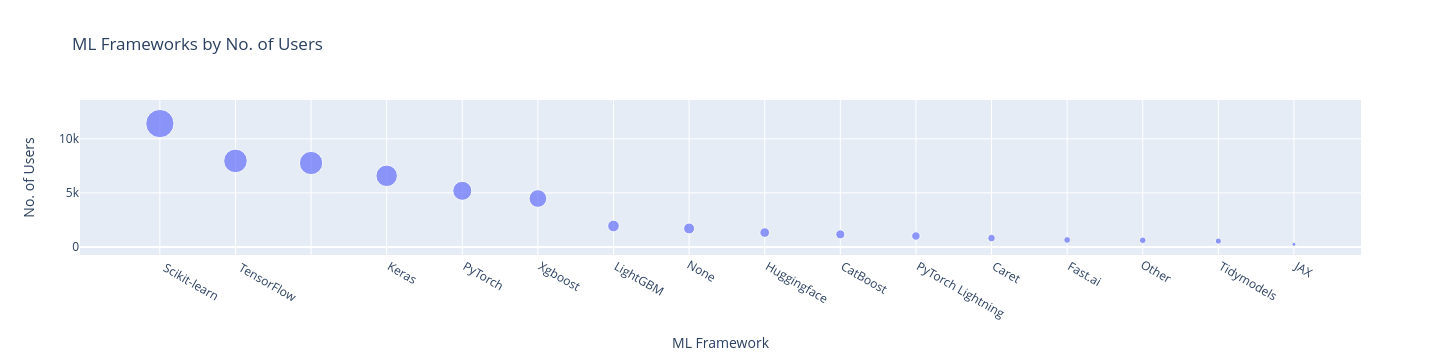

In [31]:
new_df.loc[0, "Q17"][0].split(" -")[0]

ml_fmworks_dict = new_df.explode("Q17").loc[1:, "Q17"].value_counts().to_dict()

ml_fmworks_df = pd.DataFrame(
    {"ML Framework": ml_fmworks_dict.keys(), "No. of Users": ml_fmworks_dict.values()}
)


px.scatter(
    ml_fmworks_df,
    x="ML Framework",
    y="No. of Users",
    size="No. of Users",
    title="ML Frameworks by No. of Users",
)

## Scikit-learn followed by Tensorflow are the most used ML frameworks.

# Highly Used ML Algorithms

In [32]:
new_df.loc[0, "Q18"][0].split(" -")[0]

highly_used_ml_algorithms = list(
    new_df.explode("Q18").loc[1:, "Q18"].value_counts()[:6].index
)

highly_used_ml_algorithms.pop(2)


# print('Following are the top 5 highly used Machine Learning Algorithms.:\n')
# for algo in highly_used_ml_algorithms: print(algo)

''

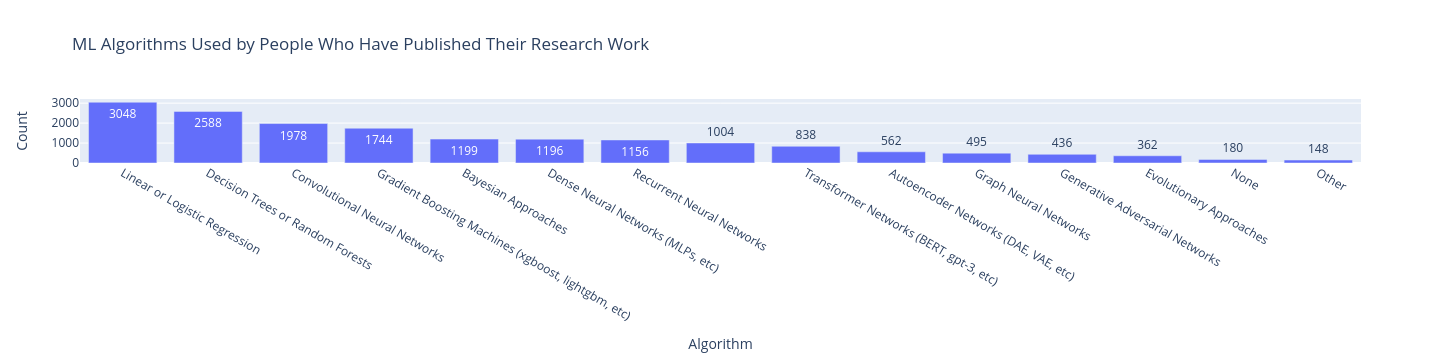

In [33]:
algo_for_research_dict = (
    new_df.explode("Q9")[new_df.explode("Q9")["Q9"] == "Yes"]
    .explode("Q18")["Q18"]
    .value_counts()
    .to_dict()
)

px.bar(
    pd.DataFrame(
        {
            "Algorithm": algo_for_research_dict.keys(),
            "Count": algo_for_research_dict.values(),
        }
    ),
    x="Algorithm",
    y="Count",
    text="Count",
    title="ML Algorithms Used by People Who Have Published Their Research Work",
)

## Following are the top 5 mostly used Machine Learning Algorithms.:

1) Linear or Logistic Regression
2) Decision Trees or Random Forests
3) Convolutional Neural Networks
4) Gradient Boosting Machines (xgboost, lightgbm, etc)
5) Bayesian Approaches

## Linear regression model is still mostly used machine learning algorithm in research.

# Computer Vision Application

In [34]:
new_df.loc[0, "Q19"][0].split(" -")[0]

new_df.loc[0, "Q19"][0].split(" -")[0]

pd.DataFrame(
    new_df.explode("Q19").loc[1:, "Q19"].value_counts()[1:]
).reset_index().rename(
    columns={"index": "Computer Vision Method", "Q19": "No. of Users"}
)

,Computer Vision Method,No. of Users
0,Image classification and other general purpose...,3664
1,"Object detection methods (YOLOv6, RetinaNet, etc)",2525
2,"Image segmentation methods (U-Net, Mask R-CNN,...",2495
3,"General purpose image/video tools (PIL, cv2, s...",2293
4,None,1455
5,"Generative Networks (GAN, VAE, etc)",1343
6,"Vision transformer networks (ViT, DeiT, BiT, B...",782
7,Other,146


## Fast exploring computer vision technologies are highly getting used for image classification and other general purpose networks like VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc.

# ML Model Hubs / Repositories

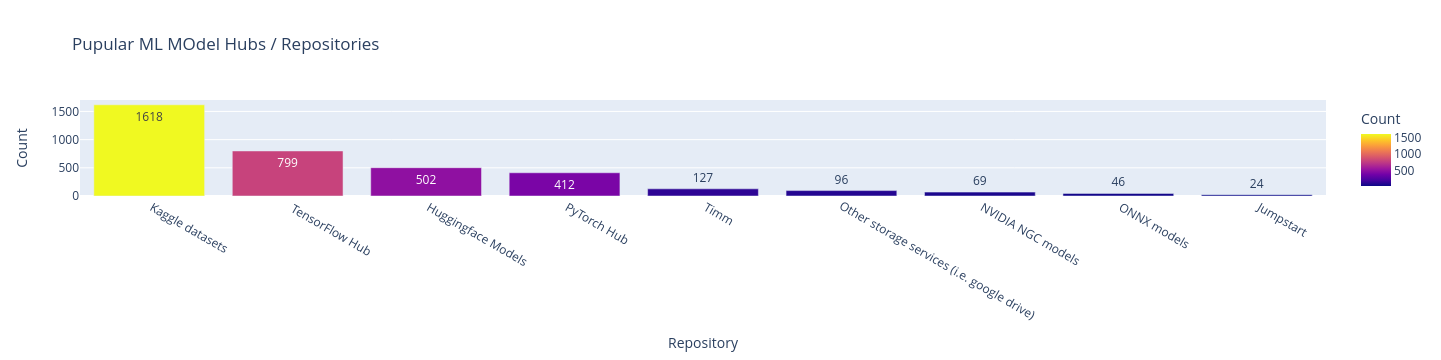

In [35]:
new_df.loc[0, "Q22"][0].split(" -")[0]

repositories_df = (
    pd.DataFrame(new_df.explode("Q22").loc[1:, "Q22"].value_counts()[1:])
    .reset_index()
    .rename(columns={"index": "Repository", "Q22": "Count"})
)

fig = px.bar(
    repositories_df,
    x="Repository",
    y="Count",
    color="Count",
    text="Count",
    title="Pupular ML MOdel Hubs / Repositories",
)
fig.show()

## Kaggle dataset repository being used widely, helping researchers/data science enthusiast to explore the DS technologies.

# Job Titles

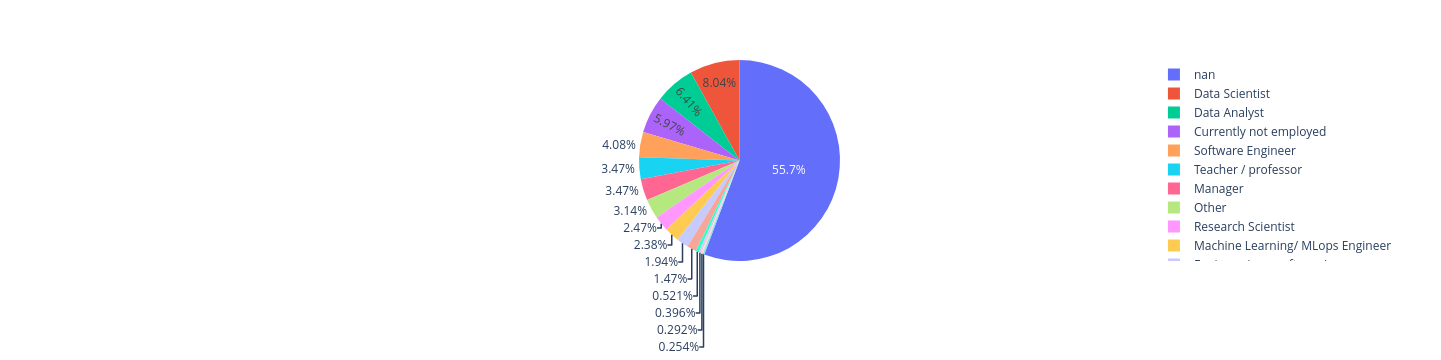

In [36]:
new_df.loc[0, "Q23"][0].split(" -")[0]

job_titles_df = (
    pd.DataFrame(new_df.explode("Q23").loc[1:, "Q23"].value_counts())
    .reset_index()
    .rename(columns={"index": "Job Title", "Q23": "Count"})
)

job_titles_df.replace(
    {
        "Data Analyst (Business, Marketing, Financial, Quantitative, etc)": "Data Analyst",
        "Manager (Program, Project, Operations, Executive-level, etc)": "Manager",
    },
    inplace=True,
)

px.pie(job_titles_df, names="Job Title", values="Count")

## It would have been great to know people are working with which title. But looks like people want to keep it confidential. 😏

# Researchers and Their Job Titles

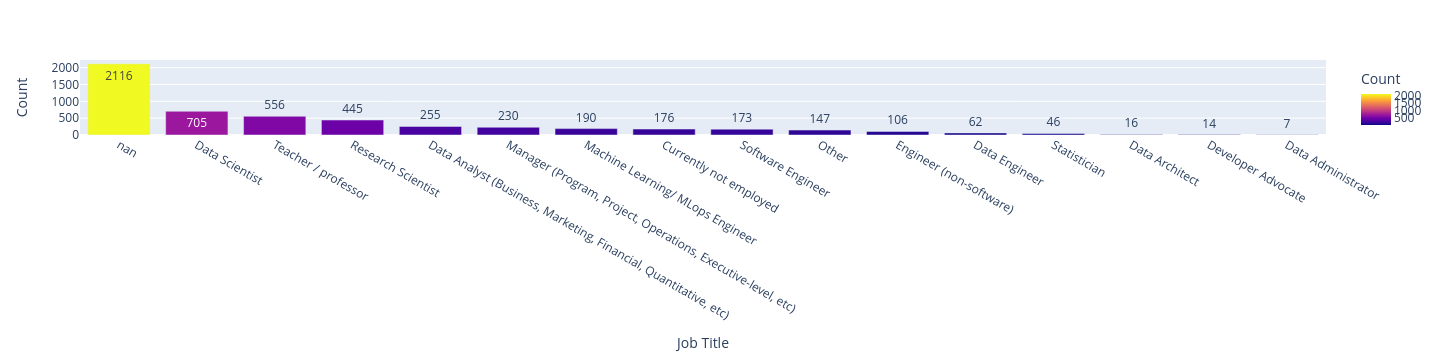

In [37]:
researchers_title = (
    pd.DataFrame(
        new_df.explode("Q9")[new_df.explode("Q9")["Q9"] == "Yes"]["Q23"]
        .apply(lambda x: x[0])
        .value_counts()
    )
    .reset_index()
    .rename(columns={"index": "Job Title", "Q23": "Count"})
)

px.bar(researchers_title, x="Job Title", y="Count", text="Count", color="Count")

## Data scientists remain at the top place in data science research work followed by teachers/professors.

# Salary Comparison Based on Coding Experience

### Based on the 2787 not-null responses, below chart shows the salaries offered by organizations

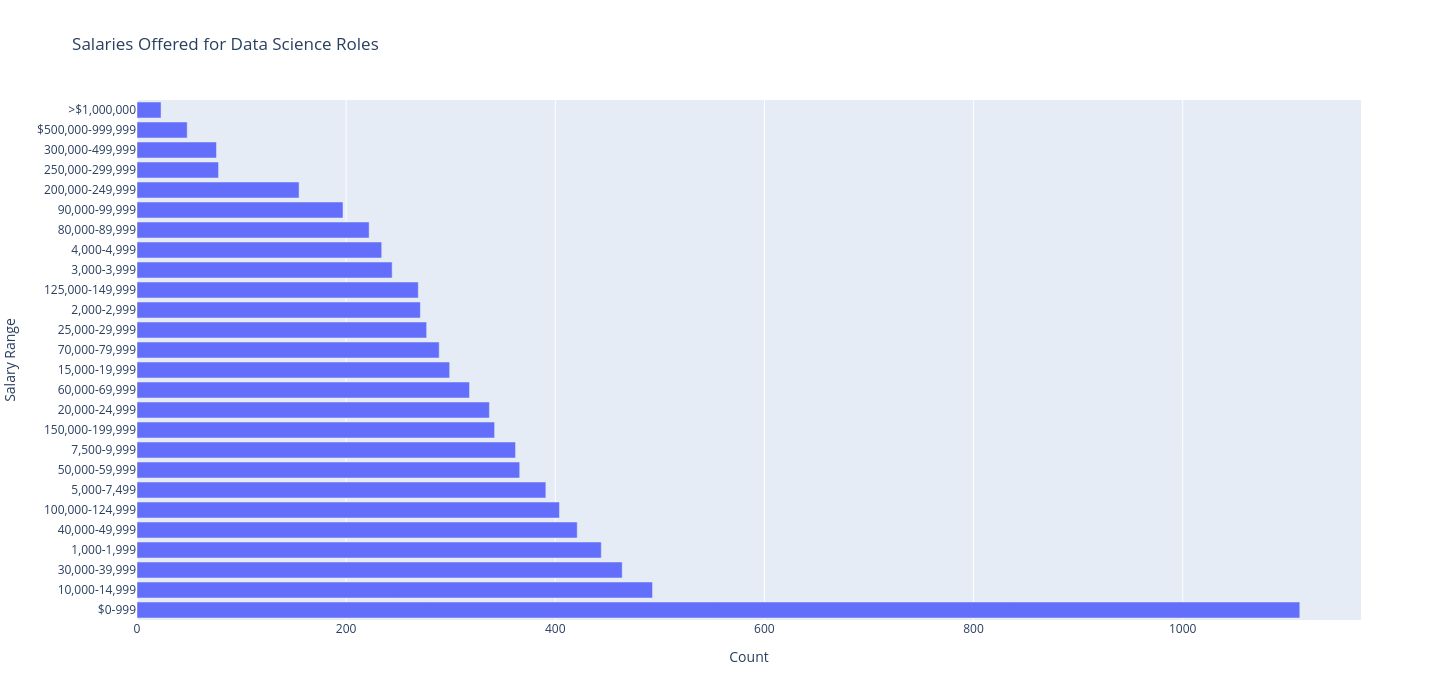

In [38]:
new_df.loc[0, "Q29"][0].split(" -")[0]


salaries = new_df.explode("Q29").loc[1:, "Q29"].value_counts()[1:].to_dict()

fig = px.bar(
    pd.DataFrame({"Salary Range": salaries.keys(), "Count": salaries.values()}),
    x="Count",
    y="Salary Range",
    barmode="group",
    height=700,
    title="Salaries Offered for Data Science Roles",
)
fig.show()

## Salary Based on YOE in Coding

In [39]:
salary_df = new_df.explode("Q11").loc[1:]

salary_df["Q29"] = salary_df["Q29"].apply(lambda x: x[0])

salary_df["Q11"].replace({"nan": np.nan}, inplace=True)
salary_df["Q29"].replace({"nan": np.nan}, inplace=True)

salary_df["Q29"].value_counts()

salary_df_new = salary_df.dropna(subset=["Q11"])
salary_df_new = salary_df.dropna(subset=["Q29"])

salary_df_new["counter"] = 1

salary_df_new.rename(
    columns={"Q11": "YOE in Coding", "Q29": "Salary Range"}, inplace=True
)

pd.pivot_table(
    salary_df_new,
    index="Salary Range",
    values="counter",
    columns="YOE in Coding",
    aggfunc="count",
).style.bar(color="lightblue", vmin=0).set_properties(**{"border": "0.5px solid black"})

YOE in Coding,1-3 years,10-20 years,20+ years,3-5 years,5-10 years,< 1 years,I have never written code
Salary Range,,,,,,,
$0-999,241,66,62,155,105,304,179
"$500,000-999,999",6,9,17,4,8,1,3
"1,000-1,999",120,34,20,61,62,91,56
"10,000-14,999",115,55,28,104,80,73,38
"100,000-124,999",28,90,93,55,104,20,14
"125,000-149,999",23,68,65,31,62,11,9
"15,000-19,999",58,29,27,56,56,48,25
"150,000-199,999",15,84,108,38,81,8,8
"2,000-2,999",53,28,17,49,41,46,37


## As expected, figures validate that with more experience in coding, people are most likely to obtain higher salary packages. But still there are few organizations who are paying well for freshers too.

# Money Spent on ML/Cloud Computing Services

In [40]:
new_df.loc[0, "Q30"][0].split(" -")[0]

money_spent_on_ml = new_df.explode("Q30").loc[1:, "Q30"].value_counts().to_dict()

money_spent_on_ml["No Response"] = money_spent_on_ml.pop("nan")

ml_cost = px.pie(
    pd.DataFrame(
        {"Money Spent": money_spent_on_ml.keys(), "Count": money_spent_on_ml.values()}
    ),
    values="Count",
    names="Money Spent",
)
ml_cost.update_layout(legend_title_text="Cost Spent", title="Money Spent on ML")